# Assignment 2: Due 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a): DONE

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0$

* $x' = v_x$

* $v_y' = -g$

* $y' = v_y$

Code the equations into a function 

In [169]:
#import the packages here
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

import math 

In [170]:
#define projectile motion function in vaccum
#def proj_vac
def proj_vac(t,state):
    g=9.8
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = 0
    y_ddot = -g
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [171]:
#initial conditions: 300 m/s at 50 deg above horizontal
#state_0 = (X_0,Y_0,VX_0,VY_0)
state_00 = (0,0,192.836,229.813)

t0 = 0 #s
tf = 50 #s
n = 1000
time_array = np.linspace(t0,tf,n)

#solve numerically 
sol_proj_vac = integrate.solve_ivp(proj_vac,(t0,tf),state_00,method='RK45', t_eval=time_array,)
print(sol_proj_vac)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.005e-02 ...  4.995e+01  5.000e+01]
        y: [[ 0.000e+00  9.651e+00 ...  9.632e+03  9.642e+03]
            [ 0.000e+00  1.149e+01 ... -7.463e+02 -7.593e+02]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 2.298e+02  2.293e+02 ... -2.597e+02 -2.602e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

938
ball hits the ground at 46.94694694694695 seconds


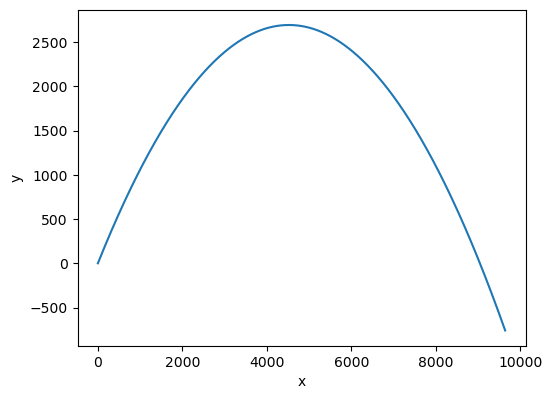

In [172]:
#plot
fig = plt.figure ()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_proj_vac.y[0],sol_proj_vac.y[1])
ax.set_xlabel('x')
ax.set_ylabel('y')

#at what time does the ball hit the ground?
index_0 = np.where((sol_proj_vac.y[1] <= 0)) [0][1]
print(index_0)
print("ball hits the ground at",time_array[index_0],"seconds")

# Part b) :DONE

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [173]:
#order 4
def rungekutta_4(f,t,state_0):
    n = len(t)
    state = np.zeros( ( n, len(state_0) ) )
    state[0] = state_0 #set inital condition 
    for i in range (0,n-1):      
        dt = t[i+1]-t[i]       
        k1 = np.array(f(t[i],state[i])); 
        k2 = np.array(f(t[i]+dt/2.0, state[i] + dt/2.0 * k1))
        k3 = np.array(f(t[i]+dt/2.0, state[i] + dt/2.0 * k2))
        k4 = np.array(f(t[i]+dt, state[i] + dt * k3))
        state[i+1] = state[i] +dt*(k1 + 2*k2 + 2*k3 + k4) / 6
                
    return state

#use to solve
sol_proj_vac_diy = rungekutta_4(proj_vac,time_array,state_00)
print(sol_proj_vac_diy)

[[   0.            0.          192.836       229.813     ]
 [   9.65145145   11.48987762  192.836       229.32250951]
 [  19.3029029    22.95520616  192.836       228.83201902]
 ...
 [9622.4970971  -733.3543534   192.836      -259.20601902]
 [9632.14854855 -746.33990216  192.836      -259.69650951]
 [9641.8        -759.35        192.836      -260.187     ]]


938
ball hits the ground at 46.94694694694695 seconds


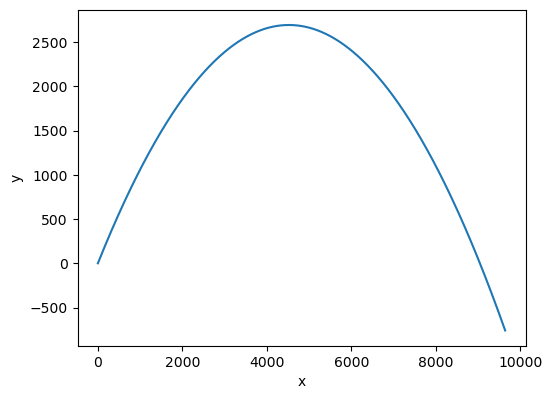

In [174]:
#plot
fig = plt.figure ()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

x_list = sol_proj_vac_diy[:, 0]
y_list = sol_proj_vac_diy[:, 1]

ax.plot(x_list,y_list)
ax.set_xlabel('x')
ax.set_ylabel('y')

#at what time does the ball hit the ground?
index_0_diy = np.where((sol_proj_vac_diy[:, 1] <= 0))[0][1]
print(index_0_diy)
print("ball hits the ground at",time_array[index_0_diy],"seconds")

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

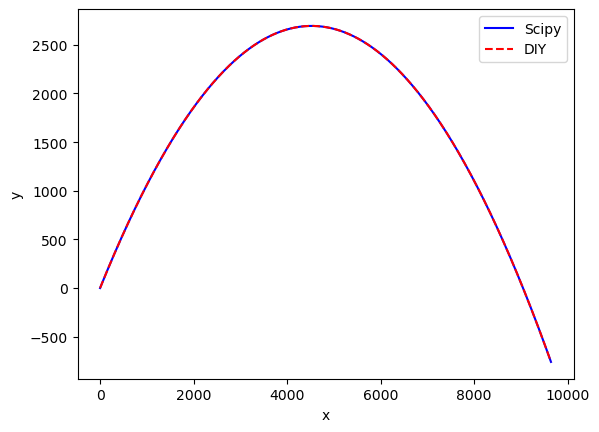

In [175]:
plt.figure()
plt.plot(sol_proj_vac.y[0],sol_proj_vac.y[1], color='blue', label='Scipy')
plt.plot(x_list,y_list, color='red', linestyle='--', label='DIY')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

#epic

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance?? ($c = const$):

* $v_x' =-\left(c/m\sqrt{v^2_x +v^2_y}\right)v_x$

* $x' = v_x$

* $v_y' = - g - \left(c/m\sqrt{v^2_x +v^2_y}\right)v_y $

* $y' = v_y$

Code the equations into a function

In [176]:
sine=math.sin(math.radians(50))
cosine=math.cos(math.radians(50))

tf2 = 35 #s
time_array2 = np.linspace(t0,tf2,n)

def const_drag(t,state):
    g=9.8
    m=13783/1000
    gamma=0.25
    D=15/100
    c=gamma*(D**2)
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = -(c/m*(math.sqrt((x_dot)**2+(y_dot)**2)))*x_dot
    y_ddot = -g - (c/m*(math.sqrt((x_dot)**2+(y_dot)**2)))*y_dot
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [177]:
sol_const_drag = integrate.solve_ivp(const_drag,(t0,tf2),state_00,method='RK45', t_eval=time_array2,)
print(sol_const_drag)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.504e-02 ...  3.496e+01  3.500e+01]
        y: [[ 0.000e+00  6.742e+00 ...  2.831e+03  2.832e+03]
            [ 0.000e+00  8.028e+00 ... -4.728e+02 -4.774e+02]
            [ 1.928e+02  1.920e+02 ...  3.344e+01  3.337e+01]
            [ 2.298e+02  2.285e+02 ... -1.312e+02 -1.313e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

891
ball hits the ground at 31.216216216216218 seconds


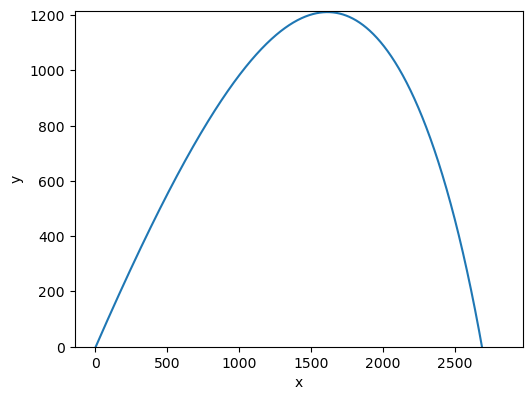

In [178]:
#plot
fig = plt.figure ()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_const_drag.y[0],sol_const_drag.y[1]-5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(0, np.max(sol_const_drag.y[1]))

#at what time does the ball hit the ground?
index_0 = np.where((sol_const_drag.y[1] <= 0)) [0][1]
print(index_0)
print("ball hits the ground at",time_array2[index_0],"seconds")

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' =-\left((\gamma D^2exp(-y/\lambda))/m\sqrt{v^2_x +v^2_y}\right)v_x$

* $x' = v_x$

* $v_y' = - g - \left((\gamma D^2exp(-y/\lambda))/m\sqrt{v^2_x +v^2_y}\right)v_y $

* $y' = v_y$

Code the equations into a function

In [179]:
sine=math.sin(math.radians(50))
cosine=math.cos(math.radians(50))


def fun_drag(t,state):
    g=9.8 #in m/s^2
    m=13783/1000  #in kg
    gamma=0.25 
    D=15/100 #in m
    lam=10000 #in m 
    c=gamma*D**2
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = -((c*math.exp(-y/lam))/m*(math.sqrt((x_dot)**2+(y_dot)**2)))*x_dot
    y_ddot = -g - ((c*math.exp(-y/lam))/m*(math.sqrt((x_dot)**2+(y_dot)**2)))*y_dot
    
    dstate_dt = [x_dot, y_dot, x_ddot, y_ddot]
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [180]:
sol_fun_drag = integrate.solve_ivp(fun_drag,(t0,tf2),state_00,method='RK45', t_eval=time_array2,)
print(sol_fun_drag)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.504e-02 ...  3.496e+01  3.500e+01]
        y: [[ 0.000e+00  6.742e+00 ...  2.944e+03  2.945e+03]
            [ 0.000e+00  8.028e+00 ... -4.275e+02 -4.321e+02]
            [ 1.928e+02  1.920e+02 ...  3.607e+01  3.600e+01]
            [ 2.298e+02  2.285e+02 ... -1.308e+02 -1.309e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

891
ball hits the ground at 31.216216216216218 seconds


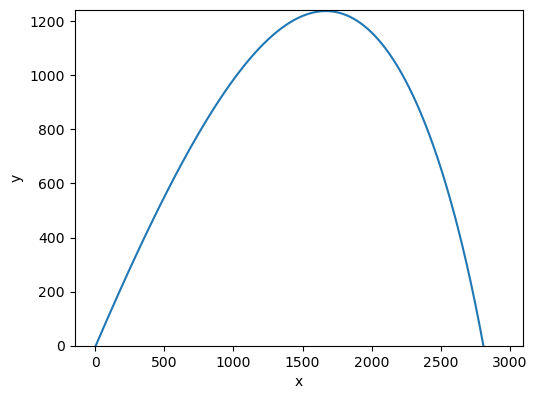

In [181]:
#plot
fig = plt.figure ()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_fun_drag.y[0],sol_fun_drag.y[1]-5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(0, np.max(sol_fun_drag.y[1]))

#at what time does the ball hit the ground?
index_0 = np.where((sol_const_drag.y[1] <= 0))[0][1]
print(index_0)
print("ball hits the ground at",time_array2[index_0],"seconds")

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

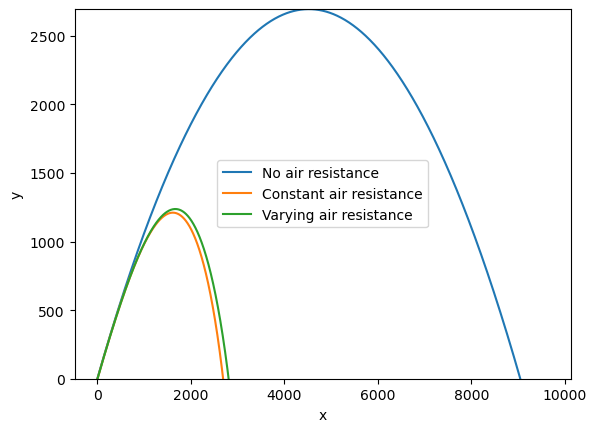

In [184]:

fig, ax = plt.subplots()

ax.plot(sol_proj_vac.y[0], sol_proj_vac.y[1], label='No air resistance')
ax.plot(sol_const_drag.y[0], sol_const_drag.y[1] - 5, label='Constant air resistance')
ax.plot(sol_fun_drag.y[0], sol_fun_drag.y[1] - 5, label='Varying air resistance')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(0, np.max([sol_proj_vac.y[1], sol_const_drag.y[1], sol_fun_drag.y[1]]))
ax.legend()

plt.show()

Your results should look like the plot below.

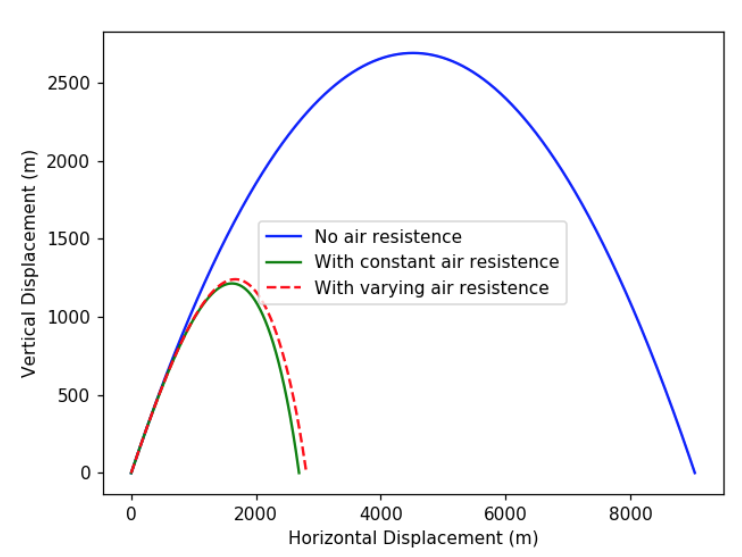

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [183]:
# turning on air resistance has more of an effect than the variation c(y)